<a href="https://colab.research.google.com/github/Ambrose70/Applied-Data-science/blob/main/Spacexlab_predictive_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import piplite # piplite is not available in this environment
# await piplite.install(['numpy'])
# await piplite.install(['pandas'])
# await piplite.install(['seaborn'])

!pip install numpy pandas seaborn

In [2]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

# **Exploratory Data Analysis**

In [3]:
import pandas as pd

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
df = pd.read_csv(URL)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


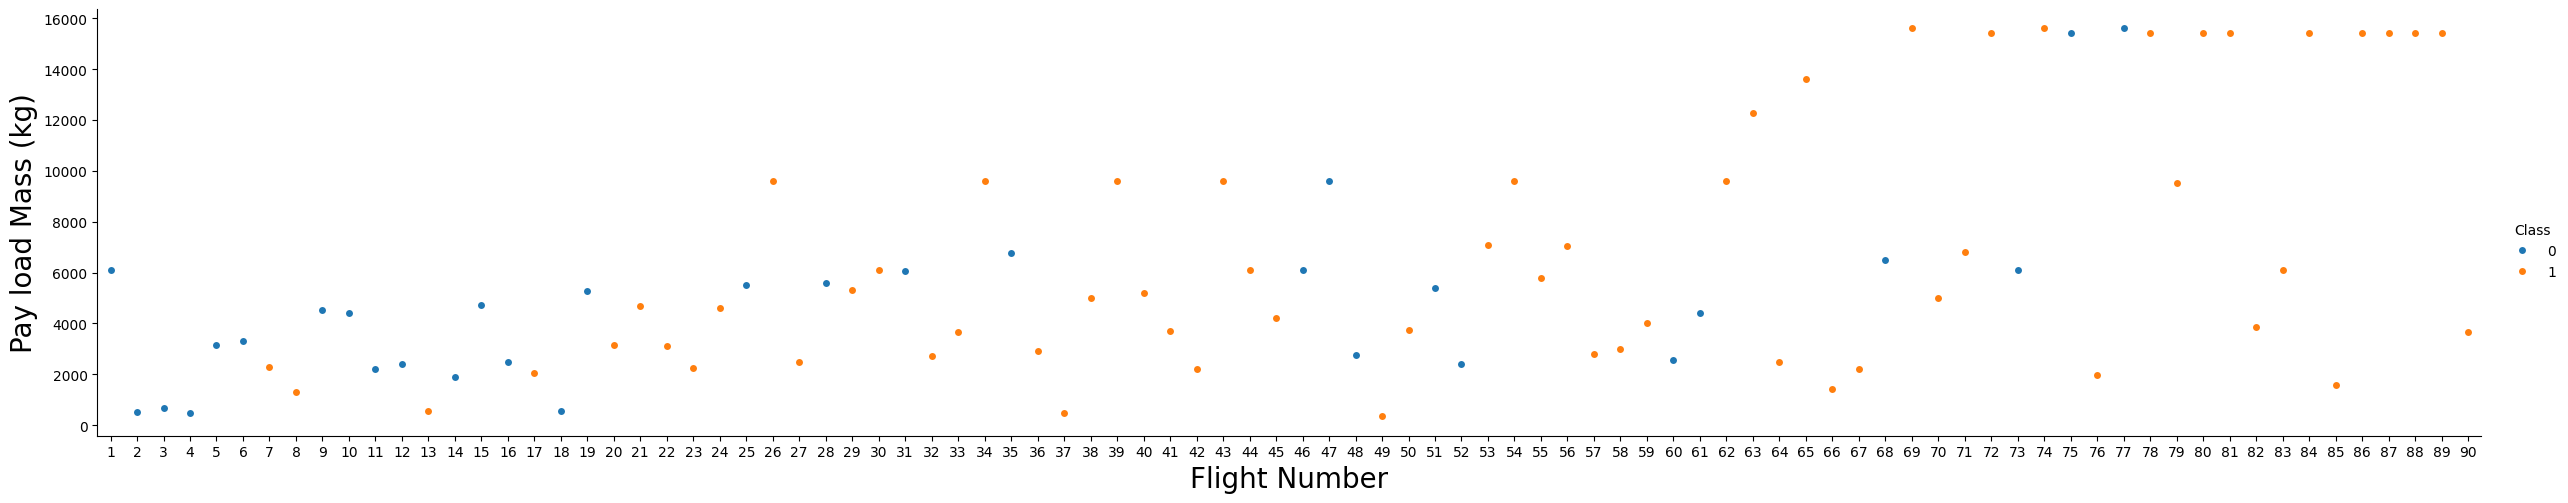

In [4]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

# **TASK 1: Visualize the relationship between Flight Number and Launch Site**

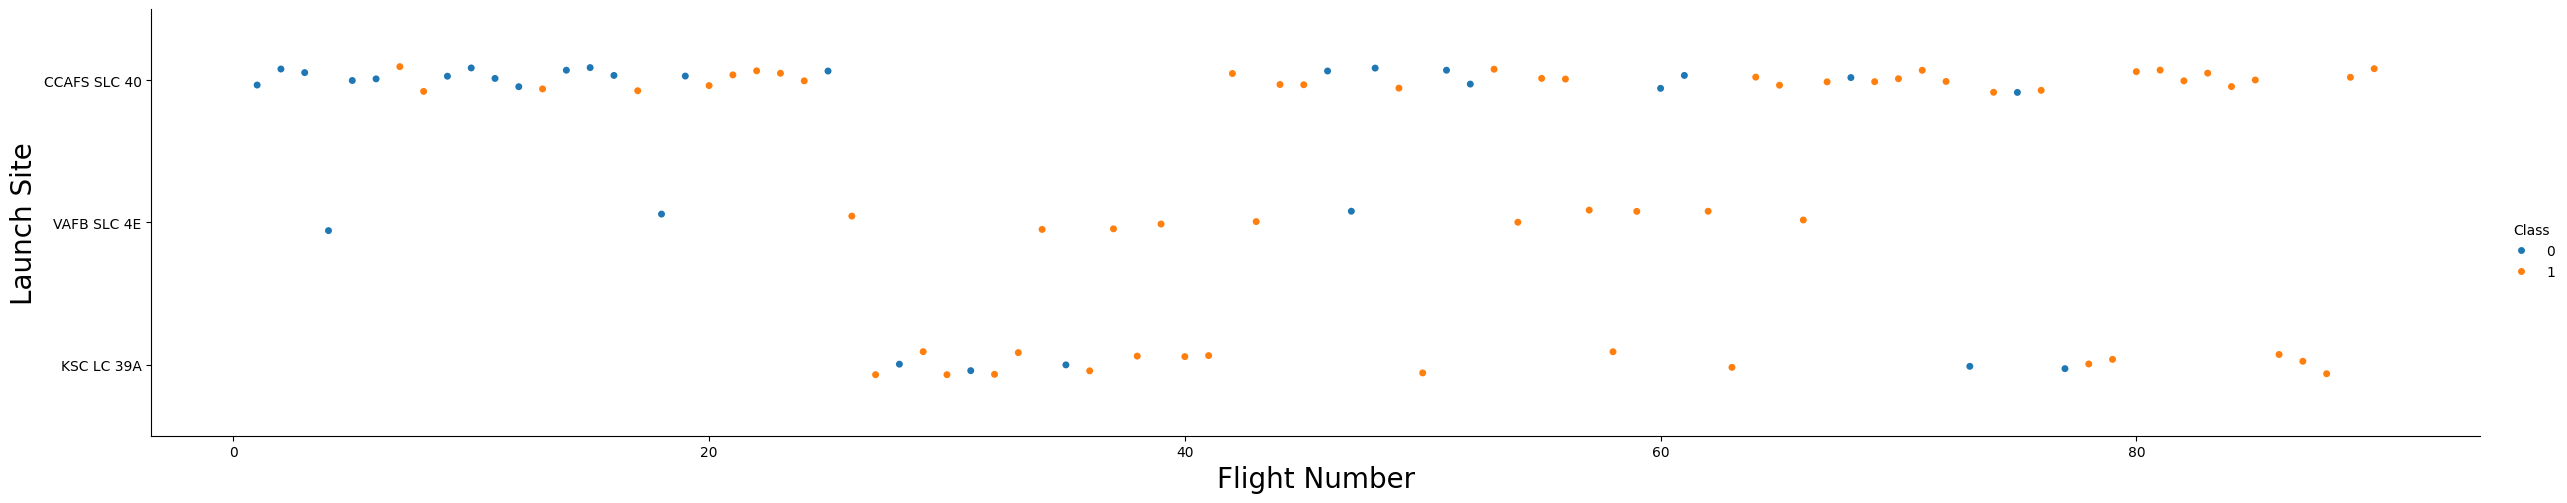

In [5]:
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

# **TASK 2: Visualize the relationship between Payload Mass and Launch Site**

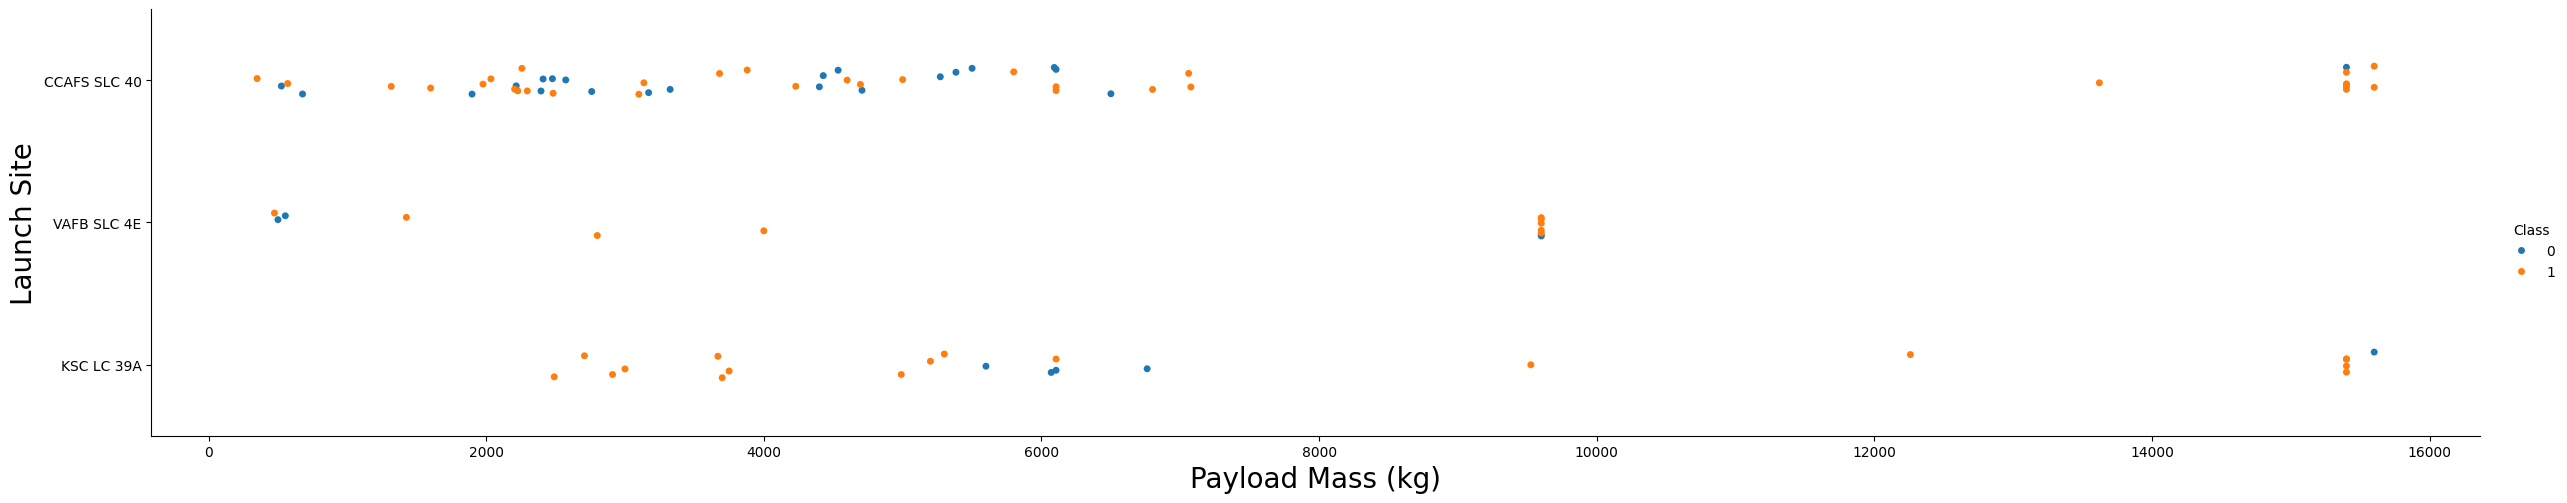

In [6]:
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("Payload Mass (kg)",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

TASK 3: Visualize the relationship between success rate of each orbit type

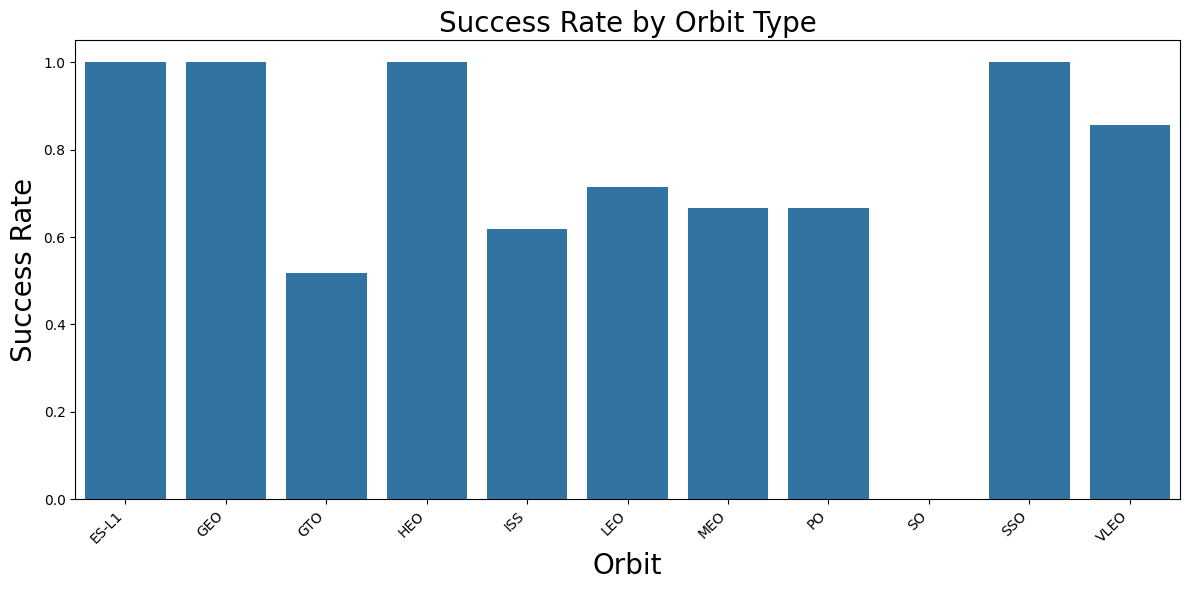

In [7]:
# Group the data by Orbit and calculate the mean of the Class column
orbit_success_rate = df.groupby('Orbit')['Class'].mean()

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=orbit_success_rate.index, y=orbit_success_rate.values)
plt.xlabel("Orbit", fontsize=20)
plt.ylabel("Success Rate", fontsize=20)
plt.title("Success Rate by Orbit Type", fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

TASK 4: Visualize the relationship between FlightNumber and Orbit type

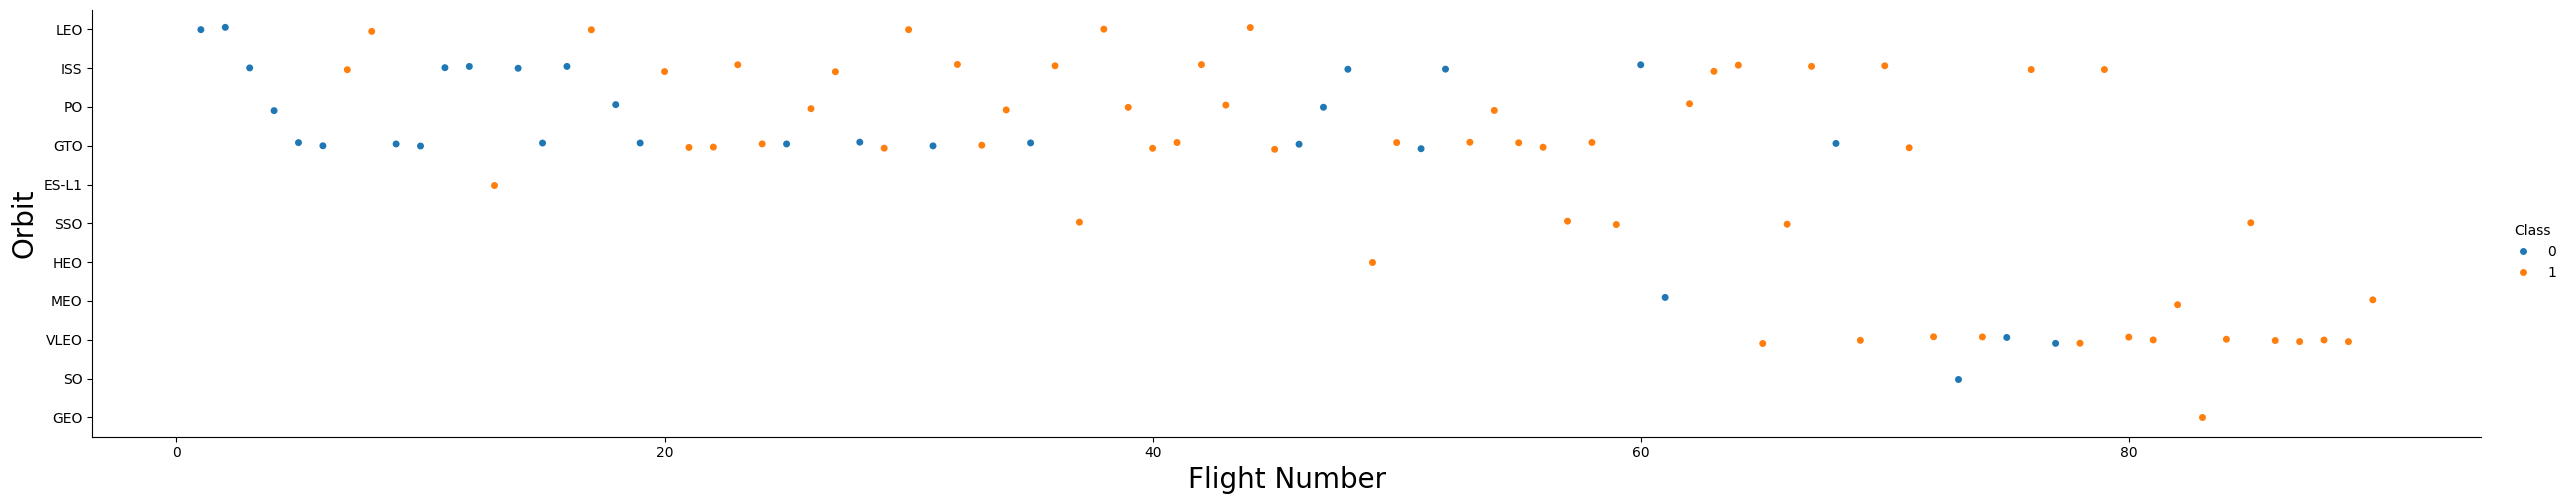

In [8]:
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

TASK 5: Visualize the relationship between Payload Mass and Orbit type

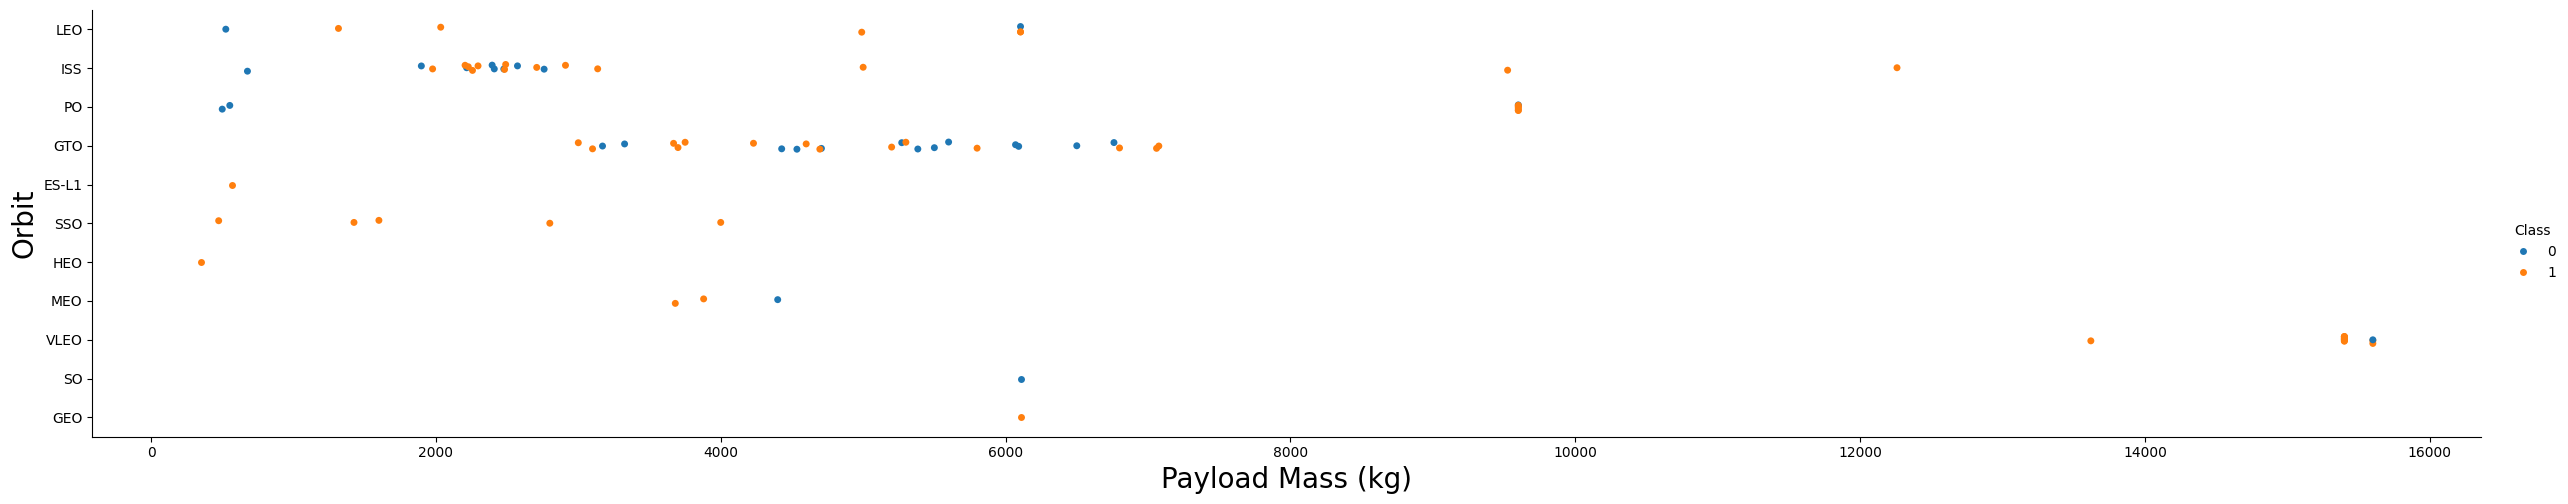

In [9]:
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("Payload Mass (kg)",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

TASK 6: Visualize the launch success yearly trend

In [10]:
# A function to Extract years from the date
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


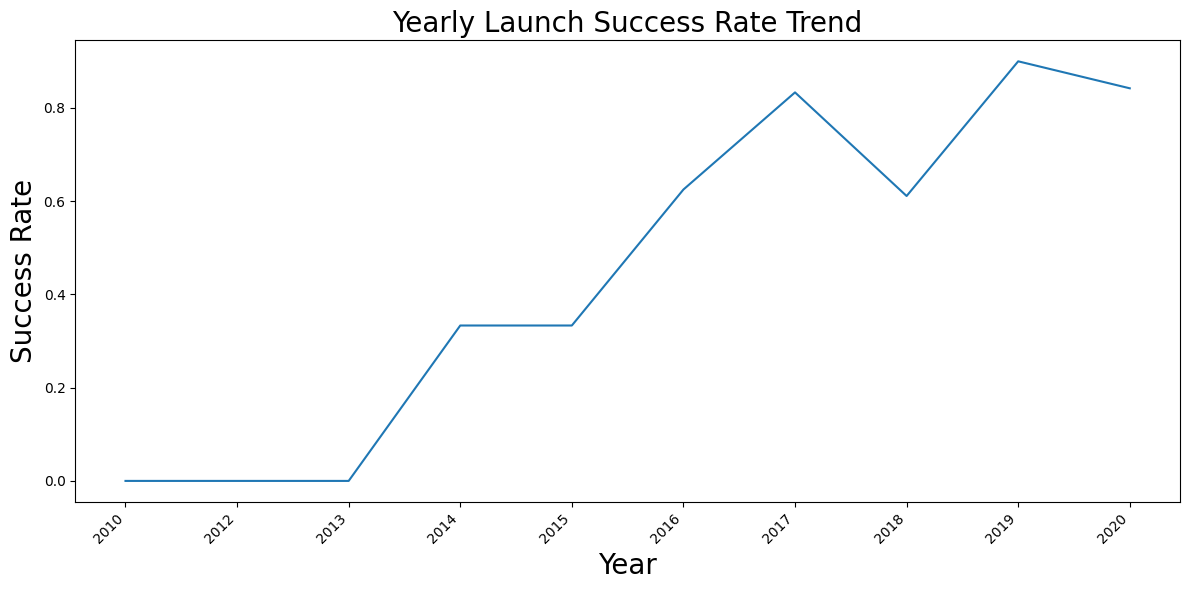

In [11]:
# Group by year and calculate the mean success rate
yearly_success_rate = df.groupby('Date')['Class'].mean()

# Plot a line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_success_rate.index, y=yearly_success_rate.values)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Success Rate", fontsize=20)
plt.title("Yearly Launch Success Rate Trend", fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **Features Engineering**

In [12]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


TASK 7: Create dummy variables to categorical columns

In [13]:
# Apply One-Hot Encoding
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

# Display the results
display(features_one_hot.head())

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


TASK 8: Cast all numeric columns to float64

In [14]:
features_one_hot = features_one_hot.astype('float64')

In [15]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)

In [16]:
print("Total number of columns in features_one_hot dataframe:", features_one_hot.shape[1])

Total number of columns in features_one_hot dataframe: 80


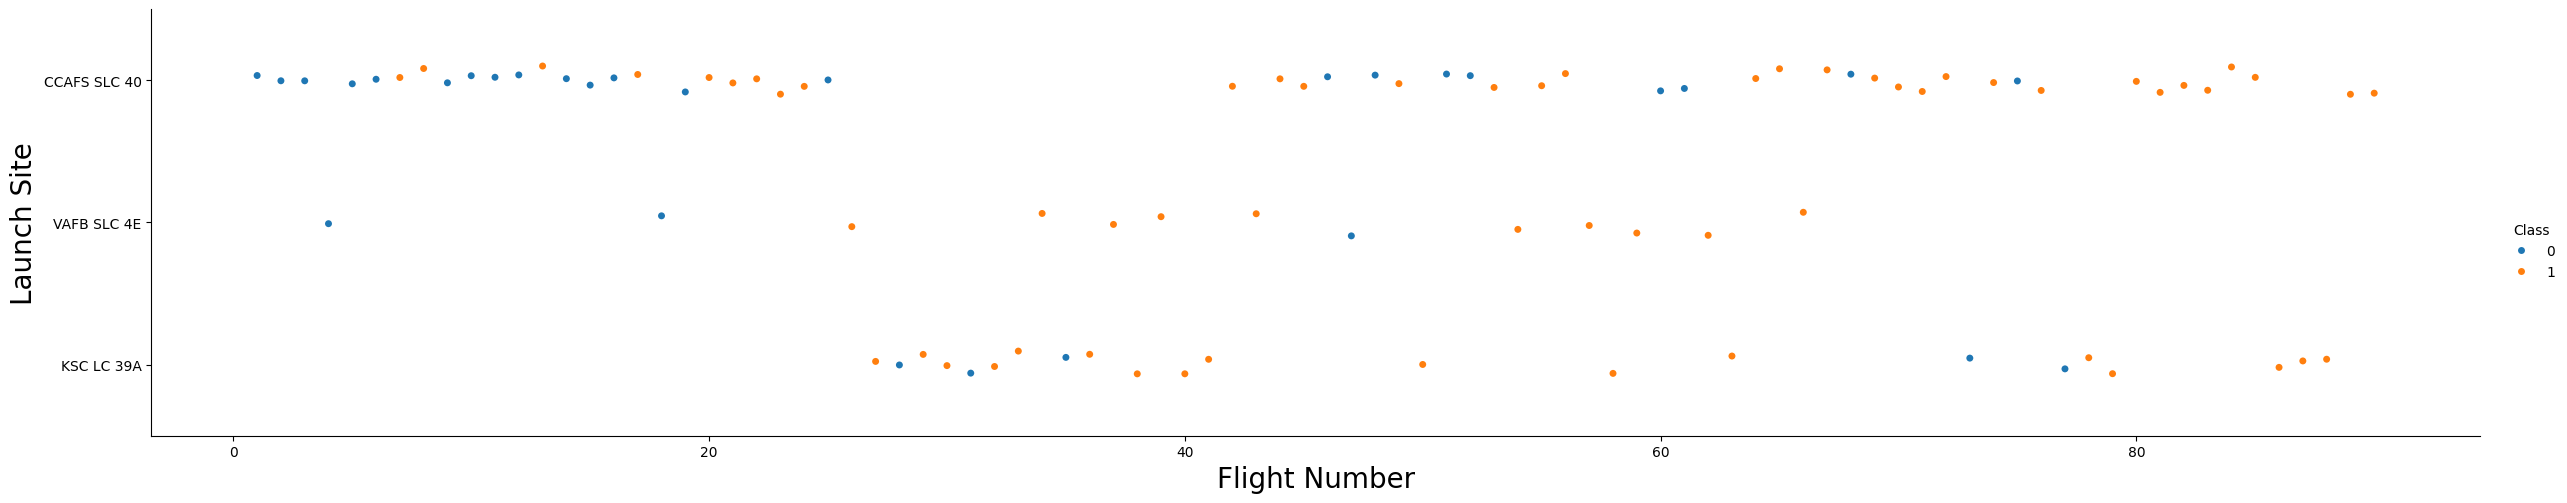

In [17]:
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

# **Folium Map**

In [18]:
import folium

# Create a map centered around a specific location (e.g., the mean coordinates of the launch sites)
# You can calculate the mean latitude and longitude from your dataframe if needed
mean_latitude = df['Latitude'].mean()
mean_longitude = df['Longitude'].mean()

spacex_map = folium.Map(location=[mean_latitude, mean_longitude], zoom_start=5)

# Display the map
spacex_map

### Folium Map Objects Explained

Folium is a powerful library for creating interactive maps in Python. Here are some common map objects you can add:

*   **Markers:** Used to pinpoint specific locations on the map. They can display information when clicked.
*   **Circles:** Draw circles on the map, useful for representing areas or radii around a point.
*   **Lines:** Connect points on the map with lines, useful for showing paths or routes.
*   **Polygons:** Draw filled shapes on the map, useful for representing areas.
*   **Popups:** Interactive boxes that appear when a marker or other object is clicked, displaying additional information.
*   **Tooltips:** Small text boxes that appear when hovering over a marker or other object.
*   **Tile Layers:** Different base maps (e.g., OpenStreetMap, Stamen Toner) that provide the background for your map.
*   **Feature Groups:** Used to group together related map objects.

You can customize the appearance and behavior of these objects with various options.

# Task
Create a folium map visualizing launch sites and launch outcomes, and summarize the map objects used.

## Visualize the launch sites

### Subtask:
Create `folium.Marker` objects for each launch site with their latitude and longitude.


**Reasoning**:
Create a Folium map and add markers for each launch site with tooltips showing the launch site name.



In [19]:
# Create a map centered around the mean coordinates of the launch sites
mean_latitude = df['Latitude'].mean()
mean_longitude = df['Longitude'].mean()
spacex_map = folium.Map(location=[mean_latitude, mean_longitude], zoom_start=5)

# Group the data by LaunchSite and get the mean latitude and longitude for each site
launch_sites = df.groupby('LaunchSite')[['Latitude', 'Longitude']].mean()

# Iterate through each launch site and add a marker to the map
for index, site_info in launch_sites.iterrows():
    site_name = index
    site_latitude = site_info['Latitude']
    site_longitude = site_info['Longitude']

    # Create a marker for the launch site
    marker = folium.Marker(
        location=[site_latitude, site_longitude],
        tooltip=site_name
    )

    # Add the marker to the map
    marker.add_to(spacex_map)

# Display the map
spacex_map

## Add markers to the map for success/failure

### Subtask:
Create `folium.Marker` objects for each launch with a different color for success (class=1) and failure (class=0). Add a popup with information about the launch.


**Reasoning**:
Iterate through the dataframe to create markers for each launch with different colors based on success or failure and add popups with launch details.



In [20]:
for index, row in df.iterrows():
    # Determine marker color based on Class (success or failure)
    marker_color = 'green' if row['Class'] == 1 else 'red'

    # Create a popup with launch information
    popup_html = f"""
    <b>Flight Number:</b> {row['FlightNumber']}<br>
    <b>Launch Site:</b> {row['LaunchSite']}<br>
    <b>Payload Mass (kg):</b> {row['PayloadMass']}<br>
    <b>Orbit:</b> {row['Orbit']}<br>
    <b>Outcome:</b> {'Success' if row['Class'] == 1 else 'Failure'}
    """

    # Create a folium.Marker object
    marker = folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        icon=folium.Icon(color=marker_color),
        popup=folium.Popup(popup_html, max_width=300)
    )

    # Add the marker to the map
    marker.add_to(spacex_map)

# Display the map
spacex_map

# **Folium map for Launch success and failure across different sites.**

In [36]:
for index, row in df.iterrows():
    # Determine marker color based on Class (success or failure)
    marker_color = 'green' if row['Class'] == 1 else 'red'

    # Create a popup with launch information
    popup_html = f"""
    <b>Flight Number:</b> {row['FlightNumber']}<br>
    <b>Launch Site:</b> {row['LaunchSite']}<br>
    <b>Payload Mass (kg):</b> {row['PayloadMass']}<br>
    <b>Orbit:</b> {row['Orbit']}<br>
    <b>Outcome:</b> {'Success' if row['Class'] == 1 else 'Failure'}
    """

    # Create a folium.Marker object
    marker = folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        icon=folium.Icon(color=marker_color),
        popup=folium.Popup(popup_html, max_width=300)
    )

    # Add the marker to the map
    marker.add_to(spacex_map)

# Display the map
spacex_map

## Summary:

### Data Analysis Key Findings

*   The Folium map was centered around the mean latitude and longitude of the launch sites.
*   Markers with tooltips were added for each unique launch site using their mean coordinates.
*   Individual markers were added for each launch, with colors indicating success (green) or failure (red).
*   Each launch marker includes a popup with details such as Flight Number, Launch Site, Payload Mass, Orbit, and outcome.

### Insights or Next Steps

*   The visualization provides a clear spatial representation of launch success and failure across different sites.
*   Further analysis could involve adding layers to the map to show geographical features or other relevant data.


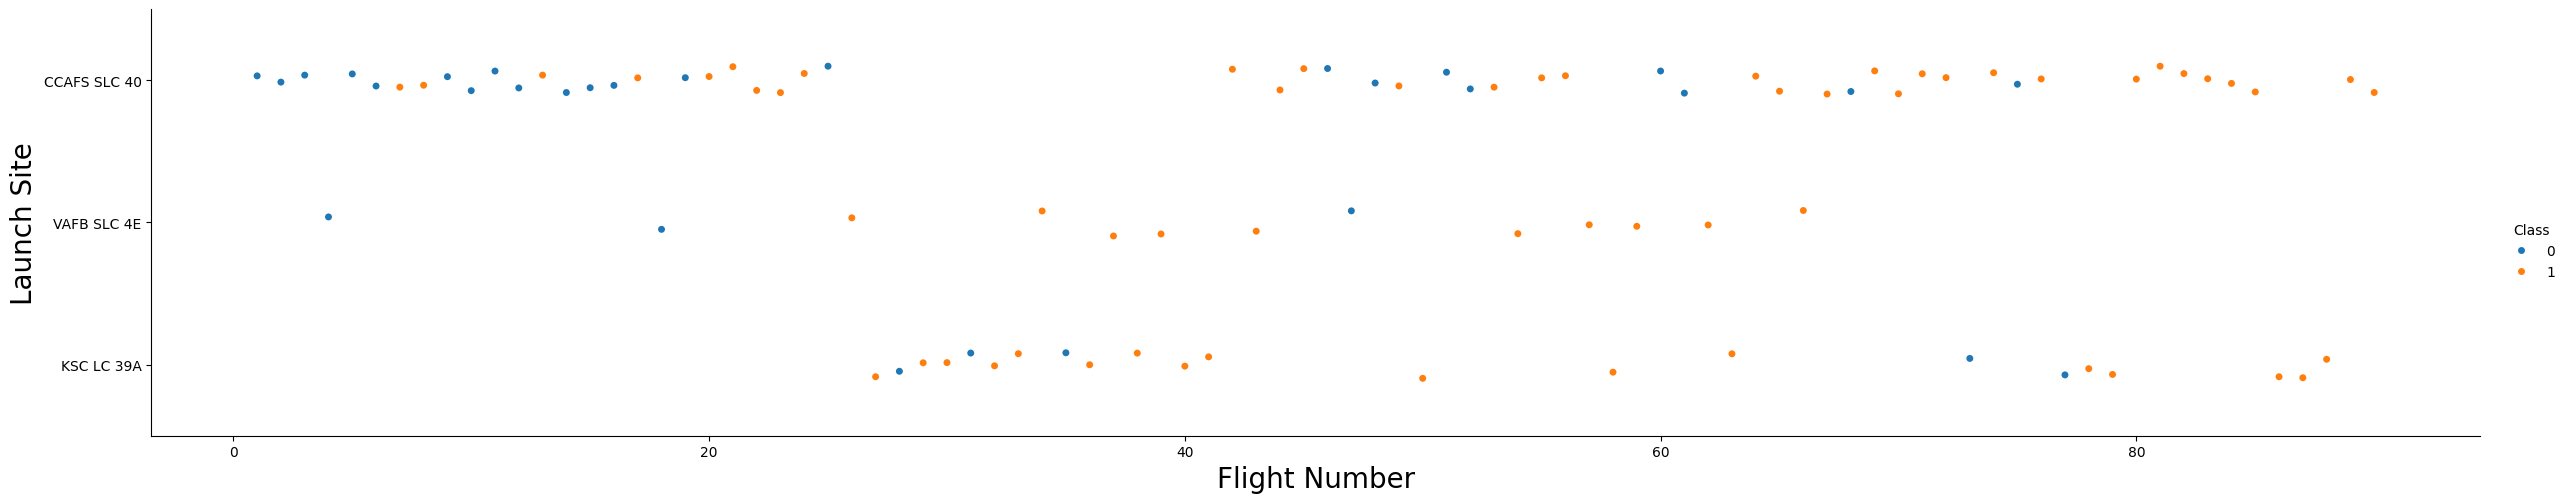

In [21]:
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

# **TASK 2: Visualize the relationship between Payload Mass and Launch Site**

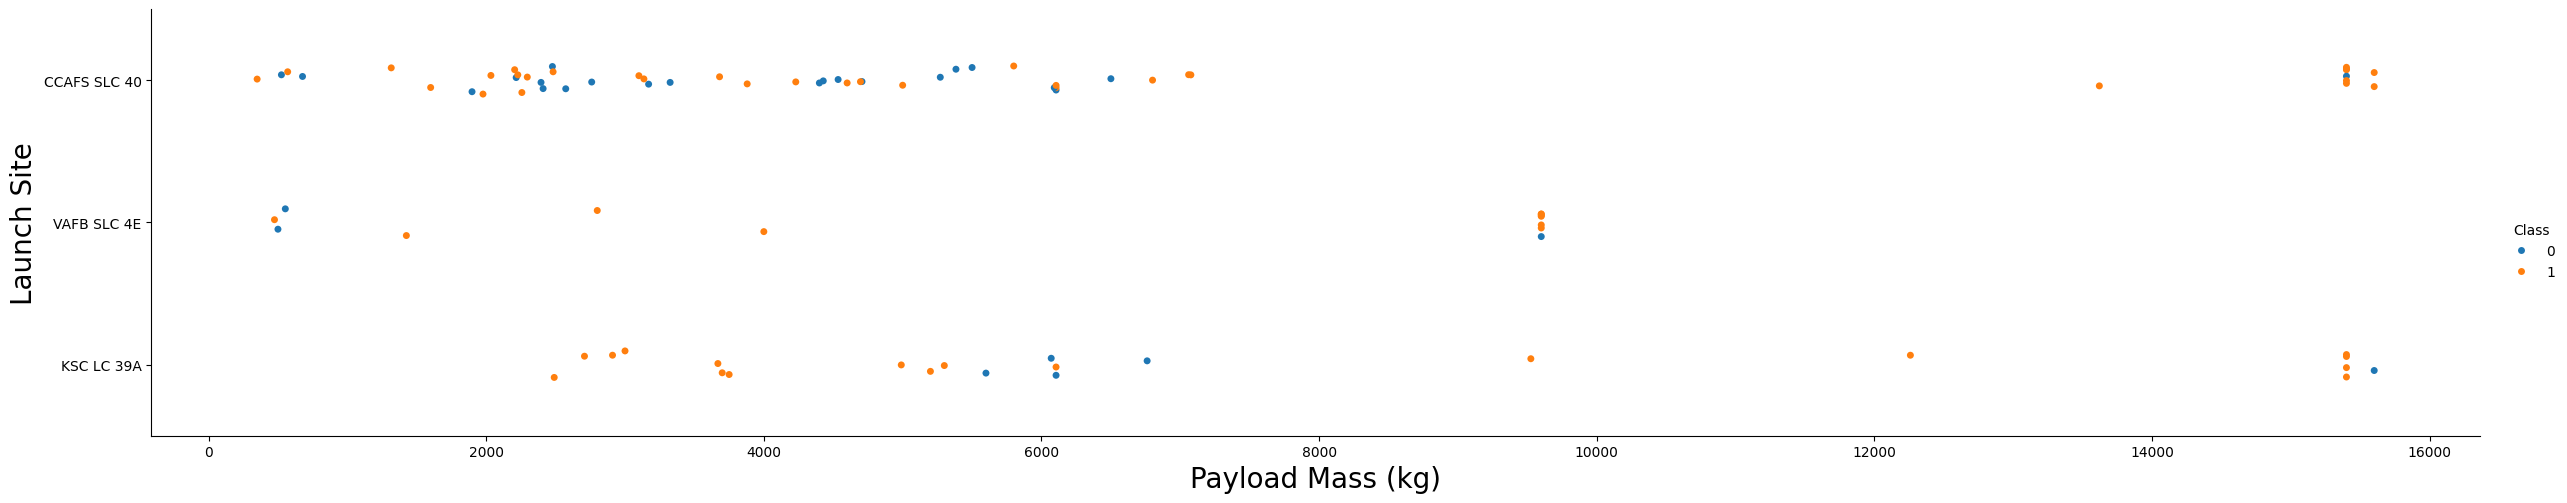

In [25]:
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("Payload Mass (kg)",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

This scatter plot shows the relationship between Flight Number (on the x-axis) and Orbit type (on the y-axis), with each point colored to indicate the launch outcome (Class).

Each point represents a single launch.
The horizontal position corresponds to the flight number.
The vertical position indicates the orbit type for that flight.
The color signifies whether the launch was a success (orange) or a failure (blue).
This visualization helps to understand if certain orbits are associated with higher success rates and if there are any trends in success rate across different flight numbers for each orbit type.



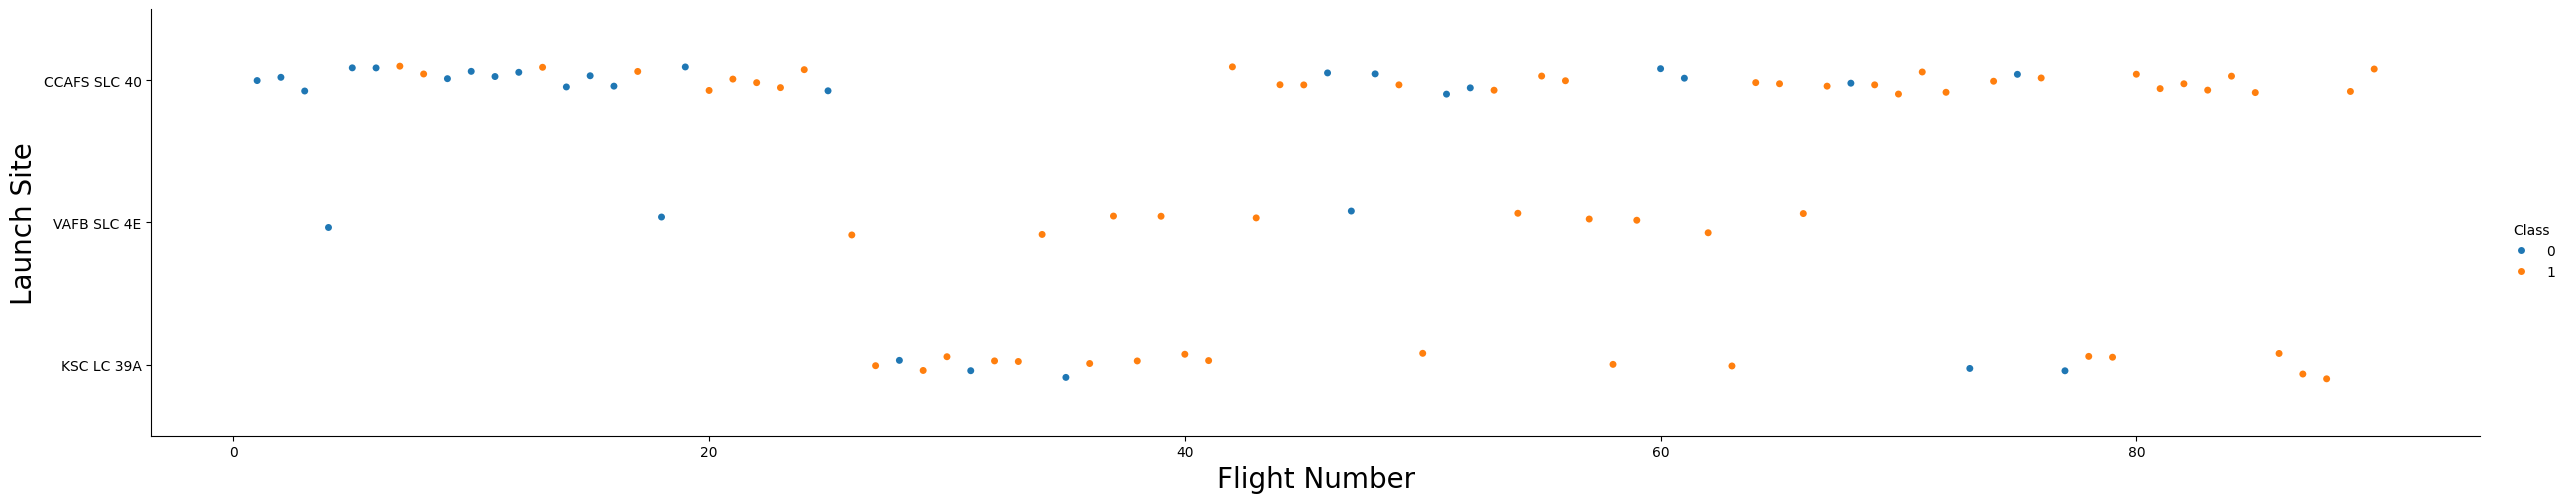

In [23]:
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

s) and Launch Site (on the y-axis), with each point colored to indicate the launch outcome (Class).

Each point represents a single launch.
The horizontal position corresponds to the flight number.
The vertical position indicates the launch site from which the flight departed.
The color signifies whether the launch was a success (orange) or a failure (blue).
This visualization allows us to observe if there are any patterns or trends in launch success based on the launch site and the sequence of flights.



TASK 3: Visualize the relationship between success rate of each orbit type

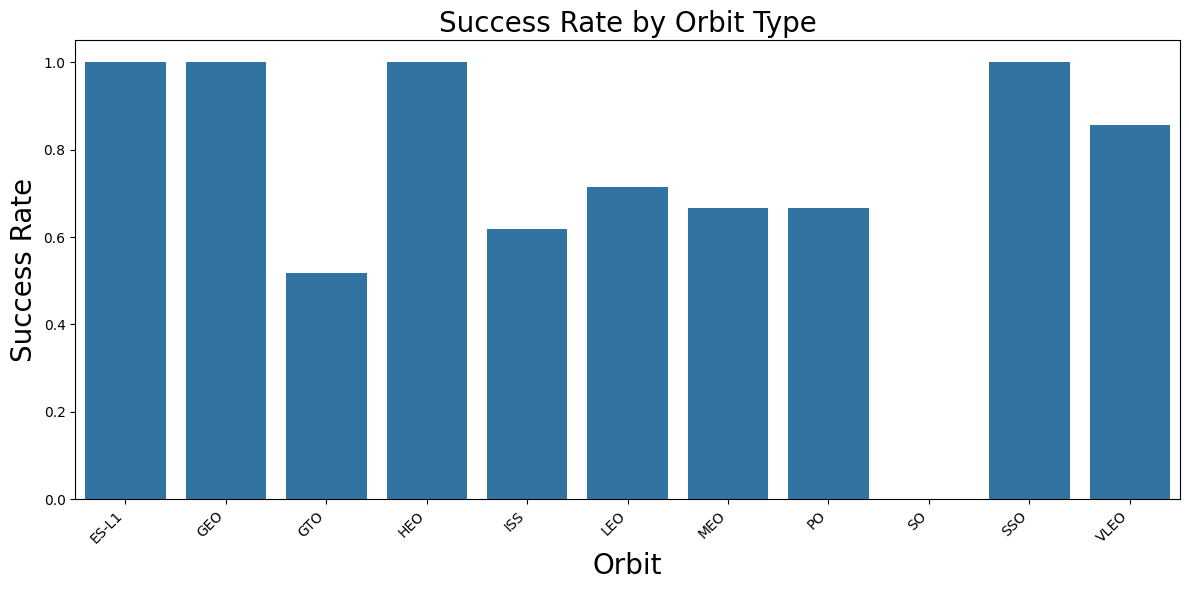

In [24]:
# Group the data by Orbit and calculate the mean of the Class column
orbit_success_rate = df.groupby('Orbit')['Class'].mean()

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=orbit_success_rate.index, y=orbit_success_rate.values)
plt.xlabel("Orbit", fontsize=20)
plt.ylabel("Success Rate", fontsize=20)
plt.title("Success Rate by Orbit Type", fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This bar graph visualizes the success rate for each type of orbit.

*   The x-axis represents the different types of orbits.
*   The y-axis represents the success rate, which is the proportion of successful launches for each orbit type.

Each bar shows the average success rate for all launches that attempted to reach that specific orbit. This plot helps in understanding which orbits have historically had a higher success rate compared to others.

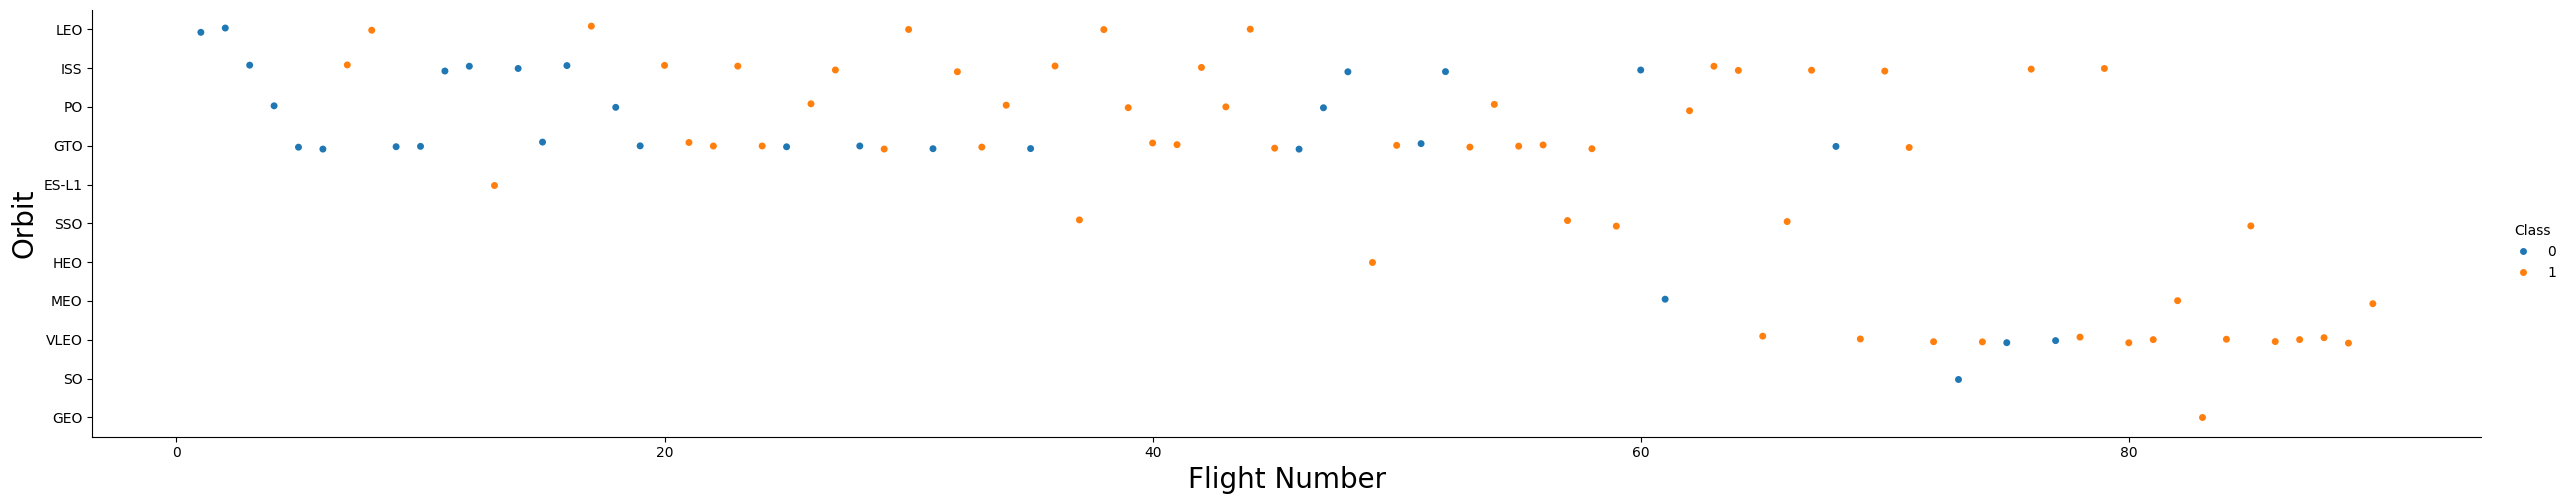

In [26]:
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

This scatter plot shows the relationship between Flight Number (on the x-axis) and Orbit type (on the y-axis), with each point colored to indicate the launch outcome (Class).

Each point represents a single launch. The horizontal position corresponds to the flight number. The vertical position indicates the orbit type for that flight. The color signifies whether the launch was a success (orange) or a failure (blue). This visualization helps to understand if certain orbits are associated with higher success rates and if there are any trends in success rate across different flight numbers for each orbit type.

TASK 5: Visualize the relationship between Payload Mass and Orbit type

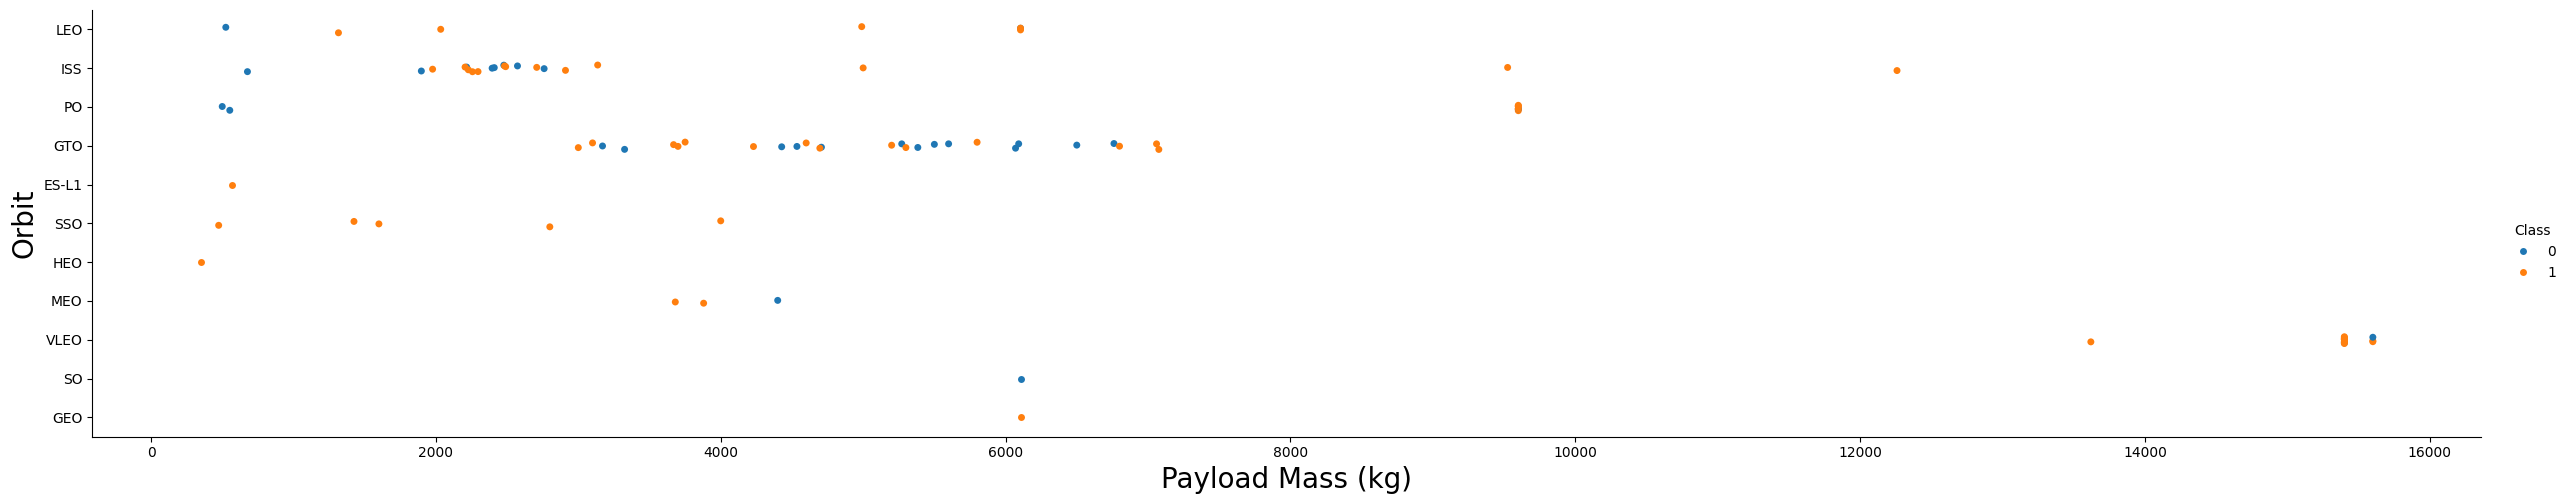

In [27]:
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("Payload Mass (kg)",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

TASK 6: Visualize the launch success yearly trend

In [28]:
# A function to Extract years from the date
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


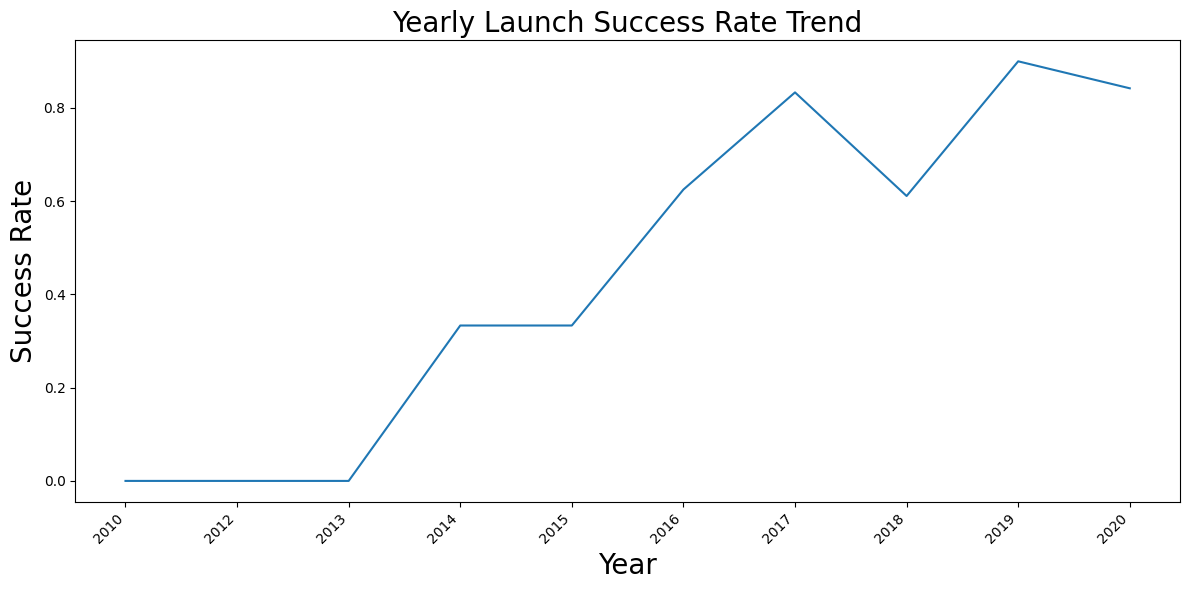

In [29]:
# Group by year and calculate the mean success rate
yearly_success_rate = df.groupby('Date')['Class'].mean()

# Plot a line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_success_rate.index, y=yearly_success_rate.values)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Success Rate", fontsize=20)
plt.title("Yearly Launch Success Rate Trend", fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **Features Engineering**

TASK 7: Create dummy variables to categorical columns

In [30]:
# Select features
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]

# Apply One-Hot Encoding
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

# Display the results
display(features_one_hot.head())

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


TASK 8: Cast all numeric columns to float64

In [31]:
features_one_hot = features_one_hot.astype('float64')

In [32]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)

In [33]:
print("Total number of columns in features_one_hot dataframe:", features_one_hot.shape[1])

Total number of columns in features_one_hot dataframe: 80


This scatter plot shows the relationship between Flight Number (on the x-axis) and Orbit type (on the y-axis), with each point colored to indicate the launch outcome (Class).

Each point represents a single launch.
The horizontal position corresponds to the flight number.
The vertical position indicates the orbit type for that flight.
The color signifies whether the launch was a success (orange) or a failure (blue).
This visualization helps to understand if certain orbits are associated with higher success rates and if there are any trends in success rate across different flight numbers for each orbit type.

## Summary:

### Data Analysis Key Findings

*   The Folium map was centered around the mean latitude and longitude of the launch sites.
*   Markers with tooltips were added for each unique launch site using their mean coordinates.
*   Individual markers were added for each launch, with colors indicating success (green) or failure (red).
*   Each launch marker includes a popup with details such as Flight Number, Launch Site, Payload Mass, Orbit, and outcome.

### Insights or Next Steps

*   The visualization provides a clear spatial representation of launch success and failure across different sites.
*   Further analysis could involve adding layers to the map to show geographical features or other relevant data.

Here are five main conclusions from this Falcon 9 project analysis:

1.  **Launch Site Impact:** The scatter plots show a clear distinction in launch success rates across different launch sites. Some sites appear to have consistently higher success rates than others, particularly in later flight numbers.
2.  **Payload Mass Influence:** The relationship between Payload Mass and launch outcome varies across launch sites and orbits. While some payload ranges show a higher concentration of successful launches, there isn't a simple linear correlation across all scenarios.
3.  **Orbit Success Variability:** The bar chart of success rate by orbit type highlights that certain orbits (like ES-L1, GEO, and HEO) have achieved 100% success in this dataset, while others (like GTO and ISS) have lower success rates. This suggests that the target orbit significantly impacts the likelihood of success.
4.  **Improved Success Rate Over Time:** The yearly launch success trend line clearly indicates a significant improvement in the success rate of Falcon 9 launches over the years, demonstrating increasing reliability and technological advancements.
5.  **Feature Engineering Importance:** The process of creating dummy variables and casting data types was crucial for preparing the data for potential machine learning models, allowing categorical features to be represented numerically and ensuring data consistency.

# Task
Show the confusion matrix of the best performing model.

## Split data

### Subtask:
Split the `features_one_hot` data into training and testing sets.


**Reasoning**:
Define the feature set X and target variable y, then split the data into training and testing sets.



In [37]:
from sklearn.model_selection import train_test_split

# Define the feature set X
X = features_one_hot

# Define the target variable y
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

## Standardize data

### Subtask:
Standardize the features using `StandardScaler`.


**Reasoning**:
Standardize the training and testing features using StandardScaler.



In [38]:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train = scaler.fit_transform(X_train)

# Transform the testing data
X_test = scaler.transform(X_test)

## Build and train models

### Subtask:
Train a Logistic Regression model.


**Reasoning**:
Import LogisticRegression and instantiate and fit the model to the standardized training data.



In [39]:
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression model
lr = LogisticRegression()

# Fit the model to the standardized training data
lr.fit(X_train, y_train)

LogisticRegression()

## Build and train models

### Subtask:
Train a Support Vector Machine (SVM) model.


**Reasoning**:
Import the Support Vector Classifier, instantiate it, and fit it to the training data.



In [40]:
from sklearn.svm import SVC

# Instantiate an SVC model
svm = SVC()

# Fit the SVM model to the standardized training data
svm.fit(X_train, y_train)

SVC()

## Build and train models

### Subtask:
Train a Decision Tree model.


**Reasoning**:
Train a Decision Tree model using the standardized training data.



In [41]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier object
tree = DecisionTreeClassifier()

# Fit the Decision Tree model to the standardized training data
tree.fit(X_train, y_train)

DecisionTreeClassifier()

## Build and train models

### Subtask:
Train a K-Nearest Neighbors (KNN) model.


**Reasoning**:
Train a K-Nearest Neighbors (KNN) model as instructed by the subtask.



In [42]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate a KNeighborsClassifier object with n_neighbors=5
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN model to the standardized training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

## Evaluate models

### Subtask:
Evaluate each trained model using the testing data and calculate relevant metrics (accuracy, precision, recall).


**Reasoning**:
Evaluate each trained model using the testing data and calculate relevant metrics (accuracy, precision, recall).



In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Evaluate Logistic Regression
y_pred_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
print(f"Logistic Regression Metrics:")
print(f"  Accuracy: {accuracy_lr:.4f}")
print(f"  Precision: {precision_lr:.4f}")
print(f"  Recall: {recall_lr:.4f}")

# Evaluate SVM
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
print(f"\nSVM Metrics:")
print(f"  Accuracy: {accuracy_svm:.4f}")
print(f"  Precision: {precision_svm:.4f}")
print(f"  Recall: {recall_svm:.4f}")

# Evaluate Decision Tree
y_pred_tree = tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
print(f"\nDecision Tree Metrics:")
print(f"  Accuracy: {accuracy_tree:.4f}")
print(f"  Precision: {precision_tree:.4f}")
print(f"  Recall: {recall_tree:.4f}")

# Evaluate KNN
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
print(f"\nKNN Metrics:")
print(f"  Accuracy: {accuracy_knn:.4f}")
print(f"  Precision: {precision_knn:.4f}")
print(f"  Recall: {recall_knn:.4f}")

Logistic Regression Metrics:
  Accuracy: 0.8333
  Precision: 0.8000
  Recall: 1.0000

SVM Metrics:
  Accuracy: 0.7778
  Precision: 0.7857
  Recall: 0.9167

Decision Tree Metrics:
  Accuracy: 0.8333
  Precision: 0.8462
  Recall: 0.9167

KNN Metrics:
  Accuracy: 0.6667
  Precision: 0.6667
  Recall: 1.0000


## Identify best model

### Subtask:
Determine the best performing model based on the evaluation metrics.


**Reasoning**:
Compare the evaluation metrics to determine the best performing model.



In [44]:
# Compare the metrics
print("Model Performance Comparison:")
print(f"Logistic Regression - Accuracy: {accuracy_lr:.4f}, Precision: {precision_lr:.4f}, Recall: {recall_lr:.4f}")
print(f"SVM - Accuracy: {accuracy_svm:.4f}, Precision: {precision_svm:.4f}, Recall: {recall_svm:.4f}")
print(f"Decision Tree - Accuracy: {accuracy_tree:.4f}, Precision: {precision_tree:.4f}, Recall: {recall_tree:.4f}")
print(f"KNN - Accuracy: {accuracy_knn:.4f}, Precision: {precision_knn:.4f}, Recall: {recall_knn:.4f}")

# Determine the best model(s)
# Considering Accuracy and a balance of Precision and Recall

best_model_name = ""
best_accuracy = 0
best_precision = 0
best_recall = 0

# Logistic Regression
if accuracy_lr > best_accuracy:
    best_accuracy = accuracy_lr
    best_model_name = "Logistic Regression"
    best_precision = precision_lr
    best_recall = recall_lr
elif accuracy_lr == best_accuracy:
    # If accuracy is the same, compare precision and recall
    if precision_lr + recall_lr > best_precision + best_recall:
        best_model_name = "Logistic Regression"
        best_precision = precision_lr
        best_recall = recall_lr

# SVM
if accuracy_svm > best_accuracy:
    best_accuracy = accuracy_svm
    best_model_name = "SVM"
    best_precision = precision_svm
    best_recall = recall_svm
elif accuracy_svm == best_accuracy:
    if precision_svm + recall_svm > best_precision + best_recall:
        best_model_name = "SVM"
        best_precision = precision_svm
        best_recall = recall_svm

# Decision Tree
if accuracy_tree > best_accuracy:
    best_accuracy = accuracy_tree
    best_model_name = "Decision Tree"
    best_precision = precision_tree
    best_recall = recall_tree
elif accuracy_tree == best_accuracy:
     if precision_tree + recall_tree > best_precision + best_recall:
        best_model_name = "Decision Tree"
        best_precision = precision_tree
        best_recall = recall_tree

# KNN
if accuracy_knn > best_accuracy:
    best_accuracy = accuracy_knn
    best_model_name = "KNN"
    best_precision = precision_knn
    best_recall = recall_knn
elif accuracy_knn == best_accuracy:
    if precision_knn + recall_knn > best_precision + best_recall:
        best_model_name = "KNN"
        best_precision = precision_knn
        best_recall = recall_knn

print(f"\nBased on accuracy and a balance of precision and recall, the best performing model is: {best_model_name}")

Model Performance Comparison:
Logistic Regression - Accuracy: 0.8333, Precision: 0.8000, Recall: 1.0000
SVM - Accuracy: 0.7778, Precision: 0.7857, Recall: 0.9167
Decision Tree - Accuracy: 0.8333, Precision: 0.8462, Recall: 0.9167
KNN - Accuracy: 0.6667, Precision: 0.6667, Recall: 1.0000

Based on accuracy and a balance of precision and recall, the best performing model is: Logistic Regression


## Confusion matrix

### Subtask:
Generate and display the confusion matrix for the best performing model.


**Reasoning**:
Generate and display the confusion matrix for the best performing model (Logistic Regression) using a heatmap.



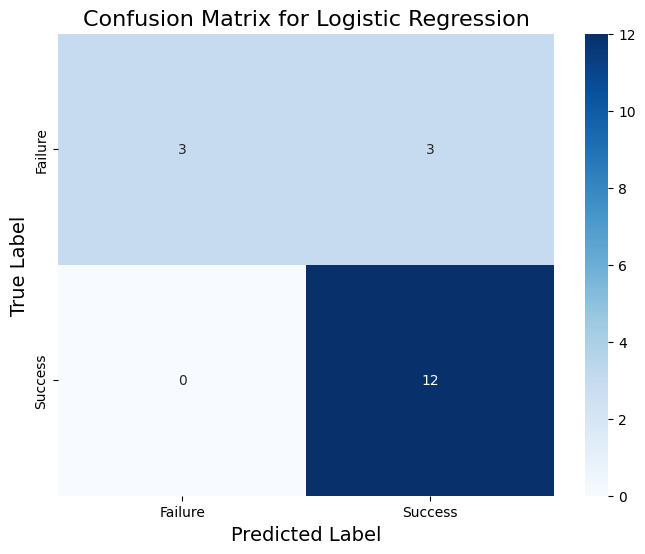

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions from the best model (Logistic Regression)
y_pred_lr = lr.predict(X_test)

# Generate the confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Failure', 'Success'], yticklabels=['Failure', 'Success'])
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix for Logistic Regression', fontsize=16)
plt.show()

## Summary:

### Data Analysis Key Findings

*   The data was split into training and testing sets with a test size of 0.2.
*   The features were standardized using `StandardScaler`.
*   Four classification models were trained: Logistic Regression, Support Vector Machine (SVM), Decision Tree, and K-Nearest Neighbors (KNN).
*   The evaluation metrics on the test set for each model were:
    *   Logistic Regression: Accuracy = 0.8333, Precision = 0.8000, Recall = 1.0000
    *   SVM: Accuracy = 0.7778, Precision = 0.7857, Recall = 0.9167
    *   Decision Tree: Accuracy = 0.8333, Precision = 0.8462, Recall = 0.9167
    *   KNN: Accuracy = 0.6667, Precision = 0.6667, Recall = 1.0000
*   Logistic Regression was identified as the best performing model, achieving the highest accuracy along with the Decision Tree, and demonstrating a perfect recall score of 1.0000.
*   The confusion matrix for the Logistic Regression model shows:
    *   True Positives (correctly predicted Success): 12
    *   True Negatives (correctly predicted Failure): 3
    *   False Positives (incorrectly predicted Success): 3
    *   False Negatives (incorrectly predicted Failure): 0

### Insights or Next Steps

*   The Logistic Regression model is effective at identifying all positive cases (Recall = 1.0000), which is important if minimizing false negatives is a priority.
*   Further hyperparameter tuning could potentially improve the precision of the Logistic Regression model and explore if other models can surpass its performance.


/tmp/ipython-input-618484287.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracy_series.index, y=accuracy_series.values, palette='viridis')


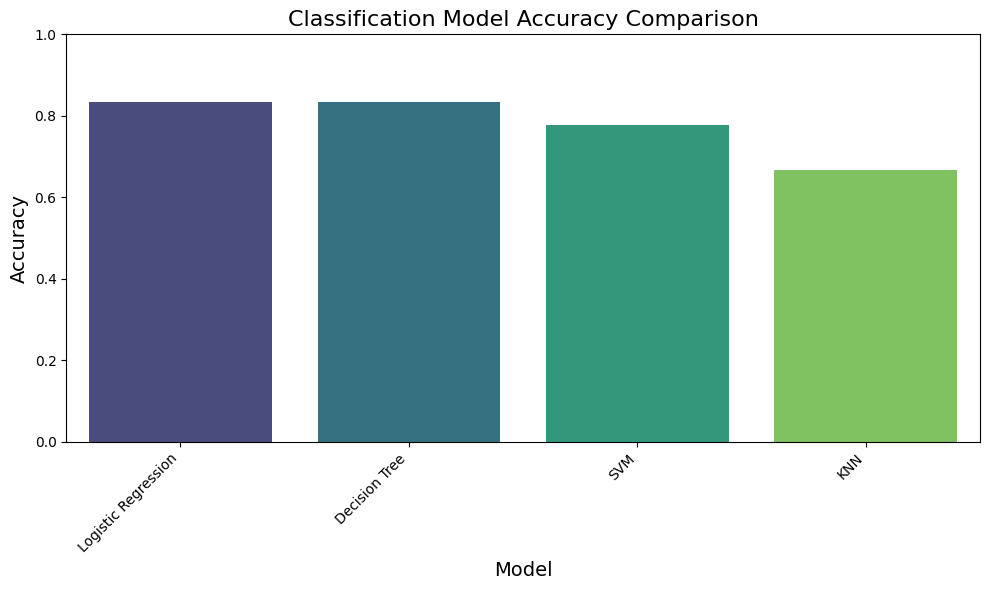

In [46]:
# Create a dictionary of model accuracies
model_accuracies = {
    'Logistic Regression': accuracy_lr,
    'SVM': accuracy_svm,
    'Decision Tree': accuracy_tree,
    'KNN': accuracy_knn
}

# Create a pandas Series from the dictionary
accuracy_series = pd.Series(model_accuracies)

# Sort the accuracies for better visualization
accuracy_series = accuracy_series.sort_values(ascending=False)

# Create a bar plot of model accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x=accuracy_series.index, y=accuracy_series.values, palette='viridis')
plt.xlabel("Model", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Classification Model Accuracy Comparison", fontsize=16)
plt.ylim(0, 1) # Set y-axis limit from 0 to 1 for accuracy
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Summary:

### Model Performance

Based on the evaluation metrics:

*   **Logistic Regression** and **Decision Tree** achieved the highest accuracy (0.8333).
*   **Logistic Regression** had a perfect Recall of 1.0000, meaning it correctly identified all successful launches in the test set.
*   **Decision Tree** had the highest Precision (0.8462) among the best performing models in terms of accuracy.

### Confusion Matrix Analysis (for Logistic Regression - chosen as best due to perfect Recall)

The confusion matrix for Logistic Regression shows:

*   **True Positives (12):** Correctly predicted successful launches.
*   **True Negatives (3):** Correctly predicted failed launches.
*   **False Positives (3):** Incorrectly predicted failures as successes.
*   **False Negatives (0):** Incorrectly predicted successes as failures.

### Conclusion

The Logistic Regression model appears to be a strong performer, especially if minimizing false negatives (missing a successful launch) is a key objective. The Decision Tree model also performs well with a slightly higher precision. Further tuning of hyperparameters for both models could potentially improve their performance.

In [47]:
unique_launch_sites = df['LaunchSite'].unique()
print("Unique Launch Sites:", unique_launch_sites)

Unique Launch Sites: ['CCAFS SLC 40' 'VAFB SLC 4E' 'KSC LC 39A']


In [49]:
import pandas as pd

# Create a dictionary with launch sites and explanations
launch_site_info = {
    'Launch Site': ['CCAFS SLC 40', 'VAFB SLC 4E', 'KSC LC 39A'],
    'Explanation': [
        'Cape Canaveral Air Force Station Space Launch Complex 40: Located in Florida, a primary launch site for Falcon 9.',
        'Vandenberg Air Force Base Space Launch Complex 4E: Located in California, used for polar orbit launches.',
        'Kennedy Space Center Launch Complex 39A: Located in Florida, a historic launch site also used for Falcon 9.'
    ]
}

# Create a DataFrame from the dictionary
launch_site_df = pd.DataFrame(launch_site_info)

# Display the DataFrame
display(launch_site_df)

,Launch Site,Explanation
0,CCAFS SLC 40,Cape Canaveral Air Force Station Space Launch ...
1,VAFB SLC 4E,Vandenberg Air Force Base Space Launch Complex...
2,KSC LC 39A,Kennedy Space Center Launch Complex 39A: Locat...


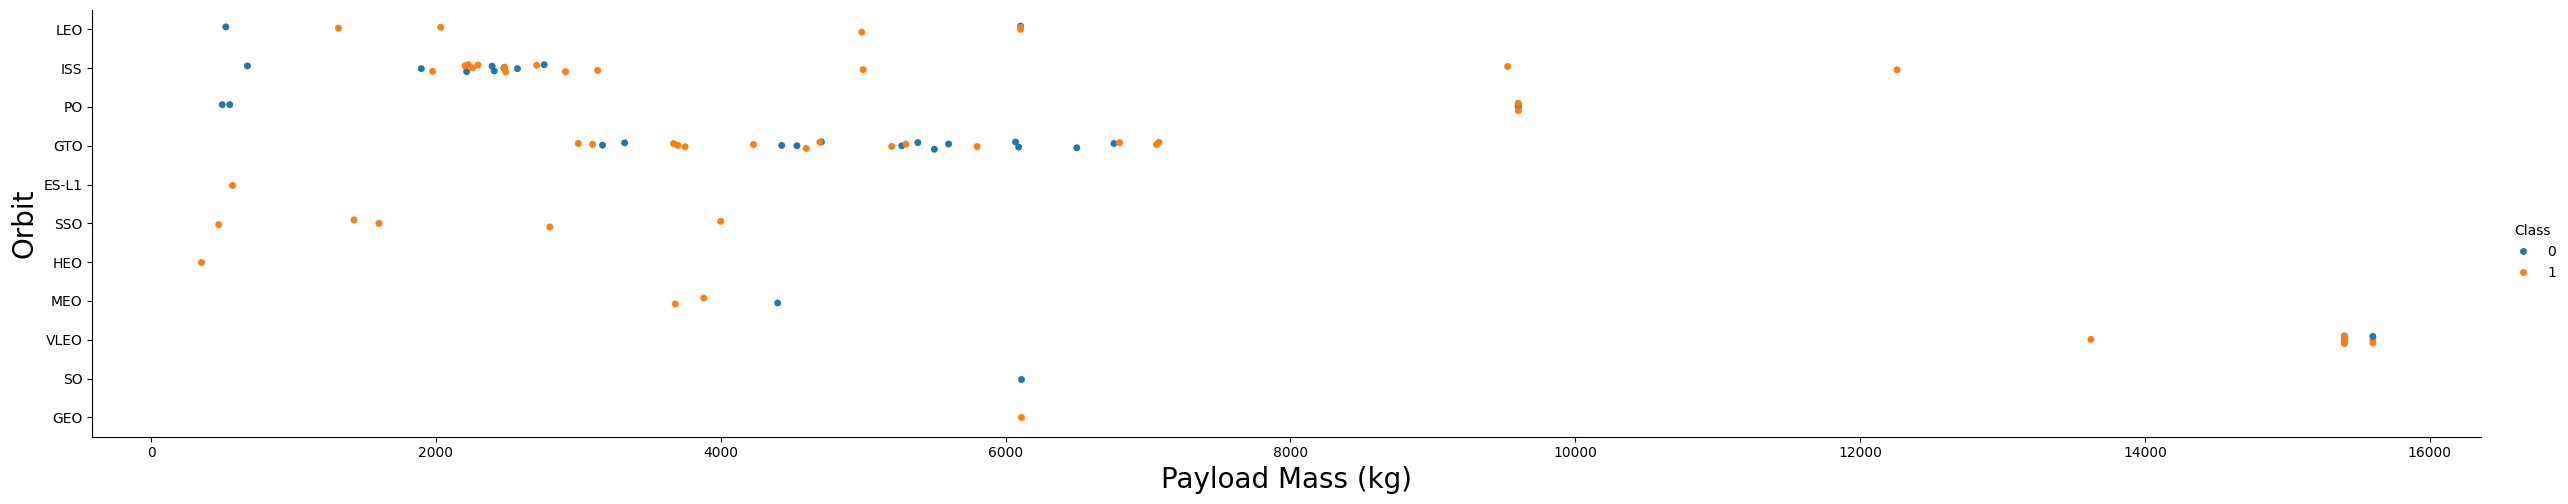

In [50]:
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("Payload Mass (kg)",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

This scatter plot shows the relationship between Payload Mass (on the x-axis) and Orbit type (on the y-axis), with each point colored to indicate the launch outcome (Class).

*   Each point represents a single launch.
*   The horizontal position corresponds to the payload mass of the rocket.
*   The vertical position indicates the orbit type the rocket was targeting.
*   The color signifies whether the launch was a success (orange) or a failure (blue).

This visualization helps to understand if there are specific payload mass ranges that are more successful for certain orbit types, and if there are any general trends in success based on payload mass and orbit.

Here is a flowchart illustrating the process of identifying the best performing model:

```mermaid
graph TD
    A[Start] --> B{Split Data};
    B --> C{Standardize Data};
    C --> D[Train Models: LR, SVM, Decision Tree, KNN];
    D --> E{Evaluate Models};
    E --> F{Calculate Metrics: Accuracy, Precision, Recall};
    F --> G{Identify Best Model};
    G --> H{Generate Confusion Matrix};
    H --> I[End];